In [39]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import os

import seaborn as sns

# Input the data

## load dataset

In [40]:
folder_path = Path('../data/Shanghai_diabetes_datasets/clinical_info/csv')

if not os.path.exists(folder_path):
    raise FileNotFoundError(f"directory {folder_path} doesn't exist")

df1 = pd.read_csv(folder_path.joinpath('Shanghai_T1DM_Summary.csv'))
df2 = pd.read_csv(folder_path.joinpath('Shanghai_T2DM_Summary.csv'))

combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df.head(9)

,Patient Number,"Gender (Female=1, Male=2)",Age (years),Height (m),Weight (kg),BMI (kg/m2),Smoking History (pack year),Alcohol Drinking History (drinker/non-drinker),Type of Diabetes,Duration of Diabetes (years),...,Glycated Albumin (%),Total Cholesterol (mmol/L),Triglyceride (mmol/L),High-Density Lipoprotein Cholesterol (mmol/L),Low-Density Lipoprotein Cholesterol (mmol/L),Creatinine (umol/L),Estimated Glomerular Filtration Rate (ml/min/1.73m2),Uric Acid (mmol/L),Blood Urea Nitrogen (mmol/L),Hypoglycemia (yes/no)
0,1001_0_20210730,1,66,1.50,60,26.67,0.0,non-drinker,T1DM,10.00,...,40.70,3.59,1.02,0.86,2.01,37.3,160,188.86,6.47,no
1,1002_0_20210504,2,68,1.70,63,21.80,50.0,drinker,T1DM,26.00,...,19.60,4.78,2.2,0.93,3.28,66.8,109,342.57,6.05,yes
2,1002_1_20210521,2,68,1.70,67,23.18,50.0,drinker,T1DM,26.00,...,19.60,4.78,2.2,0.93,3.28,69.4,104,322.18,3.06,yes
3,1002_2_20210909,2,68,1.70,65,22.49,50.0,drinker,T1DM,26.00,...,25.10,3.49,1.82,0.84,1.83,63.7,115,342.34,6.21,yes
4,1003_0_20210831,2,37,1.90,60,16.62,0.0,non-drinker,T1DM,0.08,...,46.60,5.61,1.14,1.08,3.95,49.6,174,93.39,1.85,yes
5,1004_0_20210425,1,67,1.55,47,19.56,0.0,non-drinker,T1DM,12.00,...,37.60,4.57,0.91,1.27,2.76,45.2,127,240.61,3.98,yes
6,1005_0_20210522,2,58,1.70,50,17.30,22.5,non-drinker,T1DM,16.00,...,25.70,4.05,0.46,1.57,2.12,75.4,98,205.48,3.96,yes
7,1006_0_20210114,2,57,1.61,53,20.52,0.0,non-drinker,T1DM,7.00,...,29.20,4.44,0.68,1.97,2.57,74.0,97,247.00,6.40,yes
8,1006_1_20210209,2,57,1.61,52,20.18,0.0,non-drinker,T1DM,7.00,...,27.00,5.12,0.64,1.88,2.93,82.0,91,257.00,6.40,yes


## handling missing values

In [41]:
combined_df.replace('/', pd.NA, inplace=True)  # convert / to null

cols_to_fill = [
    'Age (years)', 'Height (m)', 'Weight (kg)', 'BMI (kg/m2)', 'Smoking History (pack year)',
    'Duration of Diabetes (years)', 'Fasting Plasma Glucose (mg/dl)',
    '2-hour Postprandial Plasma Glucose (mg/dl)', 'Fasting C-peptide (nmol/L)',
    '2-hour Postprandial C-peptide (nmol/L)', 'Fasting Insulin (pmol/L)',
    '2-hour Postprandial Insulin (pmol/L)', 'HbA1c (mmol/mol)', 'Glycated Albumin (%)',
    'Total Cholesterol (mmol/L)', 'Triglyceride (mmol/L)',
    'High-Density Lipoprotein Cholesterol (mmol/L)', 'Low-Density Lipoprotein Cholesterol (mmol/L)',
    'Creatinine (umol/L)', 'Estimated Glomerular Filtration Rate  (ml/min/1.73m2)',
    'Uric Acid (mmol/L)', 'Blood Urea Nitrogen (mmol/L)'
]

for col in cols_to_fill:
    if col in combined_df.columns:
        combined_df[col] = pd.to_numeric(combined_df[col].astype(str).str.strip(), errors='coerce')

combined_df[cols_to_fill] = combined_df[cols_to_fill].fillna(combined_df[cols_to_fill].median())

combined_df.to_csv('finish_data.csv', index=False)

## analyse data

In [42]:
combined_df.describe()

,"Gender (Female=1, Male=2)",Age (years),Height (m),Weight (kg),BMI (kg/m2),Smoking History (pack year),Duration of Diabetes (years),Fasting Plasma Glucose (mg/dl),2-hour Postprandial Plasma Glucose (mg/dl),Fasting C-peptide (nmol/L),...,HbA1c (mmol/mol),Glycated Albumin (%),Total Cholesterol (mmol/L),Triglyceride (mmol/L),High-Density Lipoprotein Cholesterol (mmol/L),Low-Density Lipoprotein Cholesterol (mmol/L),Creatinine (umol/L),Estimated Glomerular Filtration Rate (ml/min/1.73m2),Uric Acid (mmol/L),Blood Urea Nitrogen (mmol/L)
count,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,...,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000
mean,1.544000,60.136000,1.655120,65.216000,23.72184,4.533600,9.059680,168.346080,263.586240,0.400936,...,75.14400,24.428000,4.785280,1.670960,1.159600,3.072320,63.012000,116.76000,320.734320,5.831440
std,0.500065,13.547017,0.094627,11.984253,3.46806,13.181143,8.399958,65.815955,84.357438,0.264888,...,26.50919,8.869616,0.990184,0.966817,0.352924,0.894042,18.655301,40.02608,89.379685,1.698329
min,1.000000,22.000000,1.420000,35.000000,13.67000,0.000000,0.010000,55.800000,72.540000,0.007000,...,23.00000,7.100000,2.510000,0.460000,0.690000,0.980000,22.600000,34.00000,93.390000,1.810000
25%,1.000000,52.000000,1.600000,56.000000,21.89000,0.000000,1.000000,124.920000,212.580000,0.230000,...,55.00000,19.500000,4.270000,1.080000,0.930000,2.520000,52.400000,99.00000,262.400000,5.210000
50%,2.000000,62.000000,1.650000,65.000000,23.44000,0.000000,7.000000,158.400000,256.320000,0.370000,...,68.00000,22.400000,4.690000,1.540000,1.080000,3.080000,62.800000,108.00000,317.030000,5.600000
75%,2.000000,68.000000,1.720000,72.000000,25.30000,0.000000,15.000000,194.400000,304.200000,0.500000,...,93.00000,28.200000,5.310000,1.810000,1.290000,3.690000,70.400000,126.00000,355.960000,6.400000
max,2.000000,97.000000,1.900000,100.000000,36.73000,80.000000,40.000000,432.000000,610.380000,1.240000,...,166.00000,71.100000,7.790000,7.650000,2.560000,5.270000,136.100000,286.00000,563.960000,15.580000


## handling duplicates

In [43]:
duplicate_rows_data = combined_df[combined_df.duplicated()]
print('duplicate_rows_data', duplicate_rows_data)

duplicate_rows_data Empty DataFrame
Columns: [Patient Number, Gender (Female=1, Male=2), Age (years), Height (m), Weight (kg), BMI (kg/m2), Smoking History (pack year), Alcohol Drinking History (drinker/non-drinker), Type of Diabetes, Duration of Diabetes (years), Acute Diabetic Complications, Diabetic Macrovascular  Complications, Diabetic Microvascular Complications, Comorbidities, Hypoglycemic Agents, Other Agents, Fasting Plasma Glucose (mg/dl), 2-hour Postprandial Plasma Glucose (mg/dl), Fasting C-peptide (nmol/L), 2-hour Postprandial C-peptide (nmol/L), Fasting Insulin (pmol/L), 2-hour Postprandial Insulin (pmol/L), HbA1c (mmol/mol), Glycated Albumin (%), Total Cholesterol (mmol/L), Triglyceride (mmol/L), High-Density Lipoprotein Cholesterol (mmol/L), Low-Density Lipoprotein Cholesterol (mmol/L), Creatinine (umol/L), Estimated Glomerular Filtration Rate  (ml/min/1.73m2), Uric Acid (mmol/L), Blood Urea Nitrogen (mmol/L), Hypoglycemia (yes/no)]
Index: []

[0 rows x 33 columns]


## uniqueness

In [44]:
for column in combined_df.columns:
    unique_value = len(combined_df[column].unique())
    print(f'{column}: {unique_value} quantity unique value')

Patient Number: 125 quantity unique value
Gender (Female=1, Male=2): 2 quantity unique value
Age (years): 45 quantity unique value
Height (m): 35 quantity unique value
Weight (kg): 42 quantity unique value
BMI (kg/m2): 100 quantity unique value
Smoking History (pack year): 15 quantity unique value
Alcohol Drinking History (drinker/non-drinker): 2 quantity unique value
Type of Diabetes: 2 quantity unique value
Duration of Diabetes (years): 36 quantity unique value
Acute Diabetic Complications: 2 quantity unique value
Diabetic Macrovascular  Complications: 8 quantity unique value
Diabetic Microvascular Complications: 8 quantity unique value
Comorbidities: 58 quantity unique value
Hypoglycemic Agents: 78 quantity unique value
Other Agents: 70 quantity unique value
Fasting Plasma Glucose (mg/dl): 81 quantity unique value
2-hour Postprandial Plasma Glucose (mg/dl): 96 quantity unique value
Fasting C-peptide (nmol/L): 62 quantity unique value
2-hour Postprandial C-peptide (nmol/L): 59 quanti

# Visualisation

## objects types

## Histogram for types of diabetes

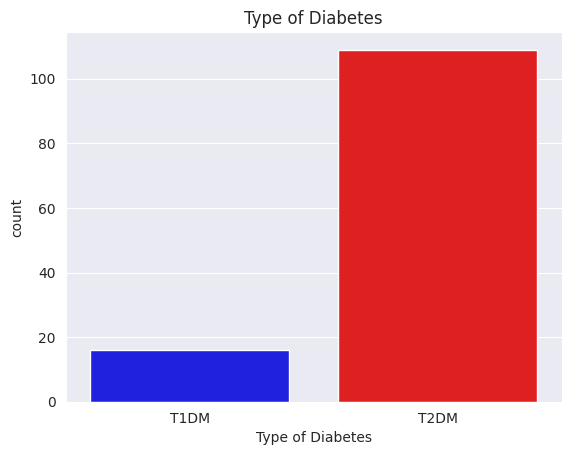

In [45]:
sns.countplot(x='Type of Diabetes', data=combined_df, hue='Type of Diabetes', palette=['blue', 'red'])
plt.title('Type of Diabetes')
plt.show()

## Histogram for types of diabetes

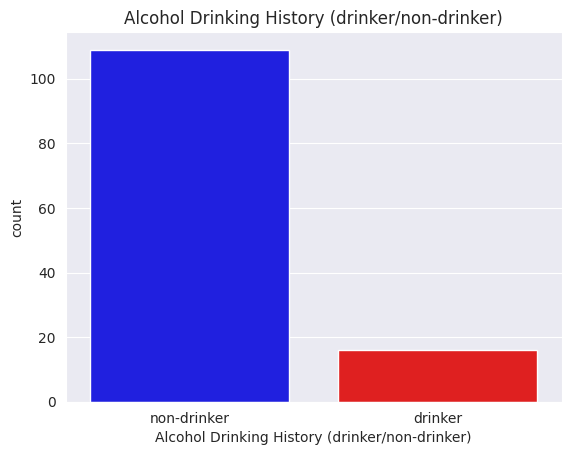

In [46]:
sns.countplot(x='Alcohol Drinking History (drinker/non-drinker)', hue='Alcohol Drinking History (drinker/non-drinker)',
              palette=['blue', 'red'], data=combined_df)
plt.title('Alcohol Drinking History (drinker/non-drinker)')
plt.show()

## Histogram for Acute Diabetic Complications

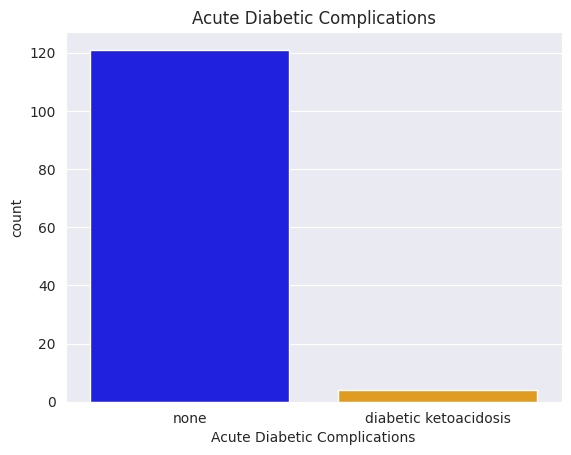

In [47]:
sns.countplot(x='Acute Diabetic Complications', hue='Acute Diabetic Complications', data=combined_df,
              palette=['blue', 'orange'])
plt.title('Acute Diabetic Complications')
plt.show()
# peripheral arterial list_of_categories, cerebrovascular list_of_categories

## Diabetic Macrovascular Complications

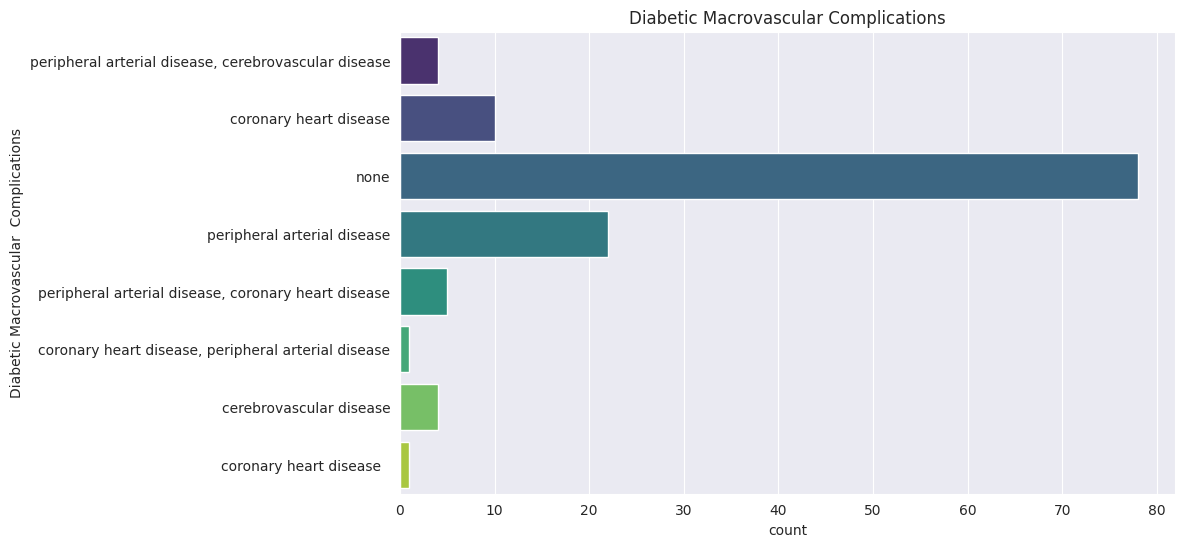

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Diabetic Macrovascular  Complications', hue='Diabetic Macrovascular  Complications', data=combined_df,
              palette='viridis')
plt.title('Diabetic Macrovascular Complications')
plt.show()

## Diabetic Microvascular Complications

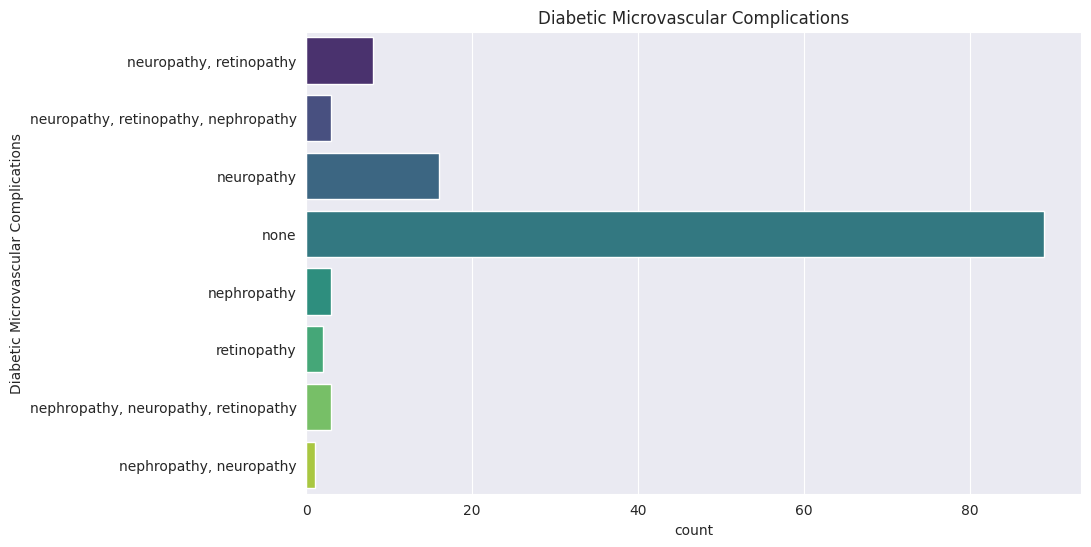

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Diabetic Microvascular Complications', hue='Diabetic Microvascular Complications', data=combined_df,
              palette='viridis')
plt.title('Diabetic Microvascular Complications')
plt.show()

In [50]:
combined_df['Diabetic Microvascular Complications'].value_counts()

Diabetic Microvascular Complications
none                                    89
neuropathy                              16
neuropathy, retinopathy                  8
neuropathy, retinopathy, nephropathy     3
nephropathy                              3
nephropathy, neuropathy, retinopathy     3
retinopathy                              2
nephropathy, neuropathy                  1
Name: count, dtype: int64

## Comorbidities

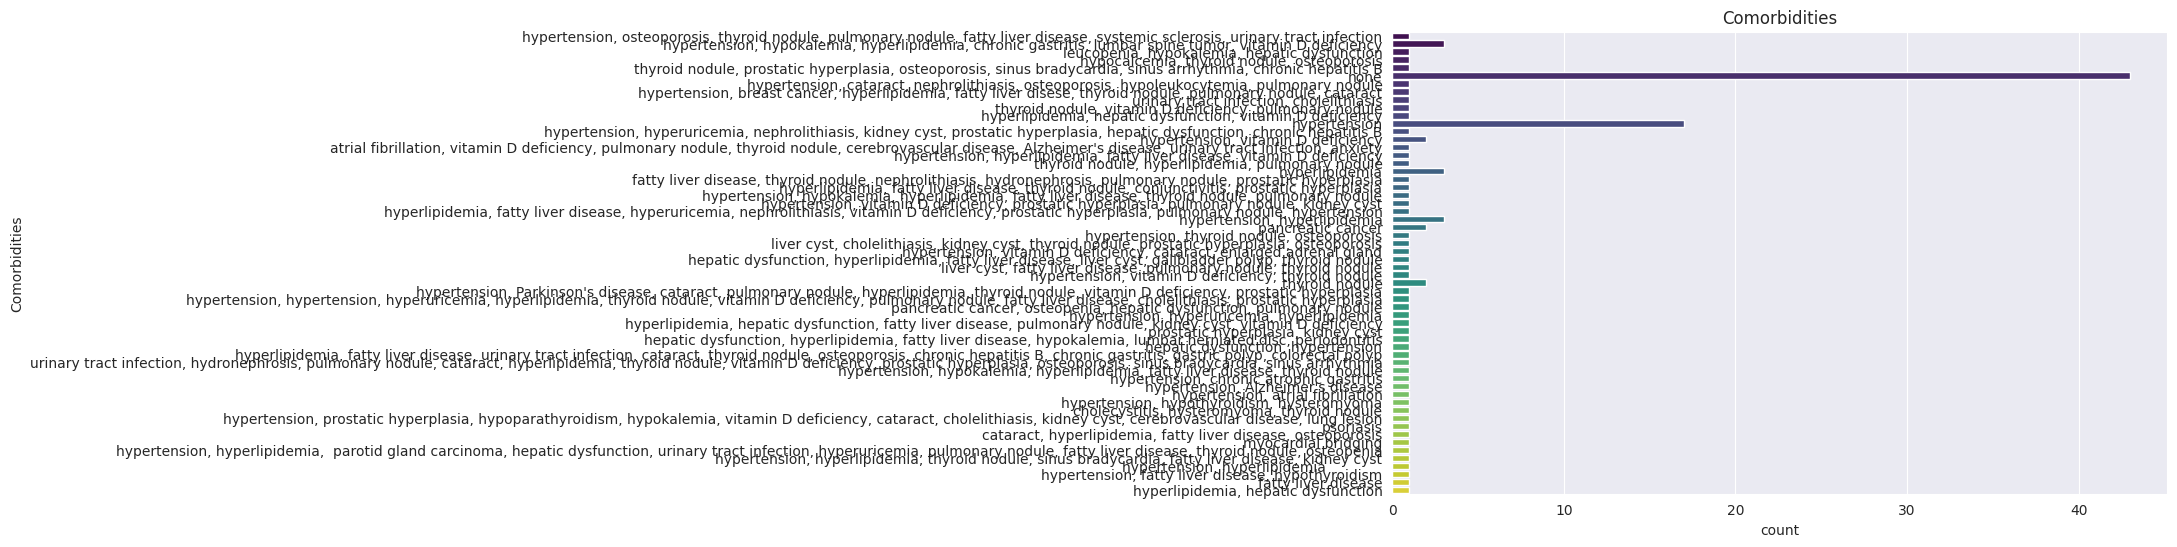

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Comorbidities', hue='Comorbidities', data=combined_df,
              palette='viridis')
plt.title('Comorbidities')
plt.show()

## Hypoglycemic Agents

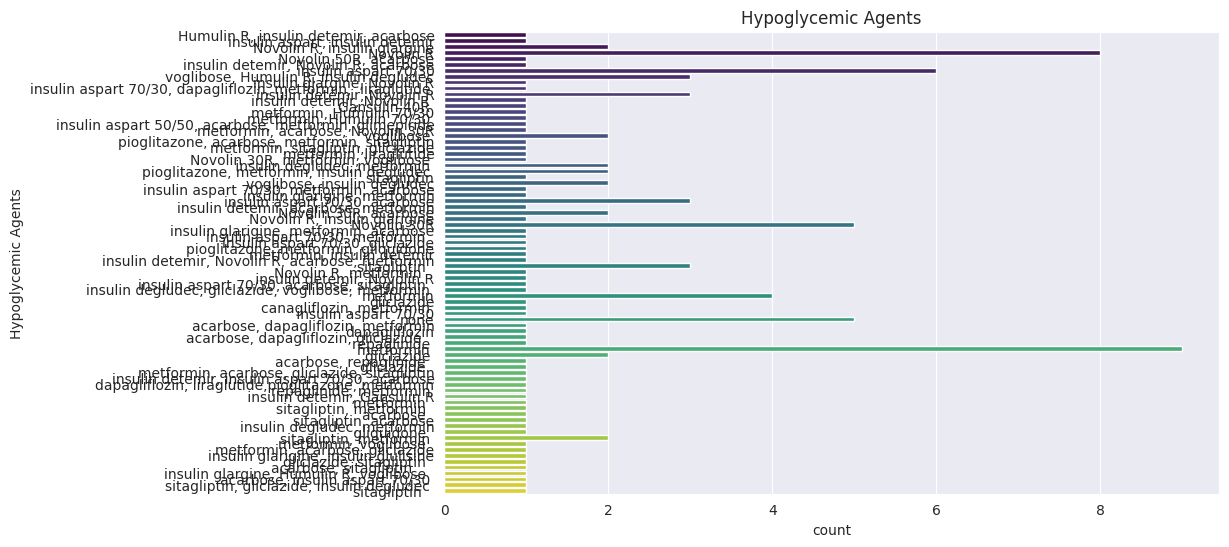

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Hypoglycemic Agents', hue='Hypoglycemic Agents', data=combined_df,
              palette='viridis')
plt.title('Hypoglycemic Agents')
plt.show()

## Other Agents

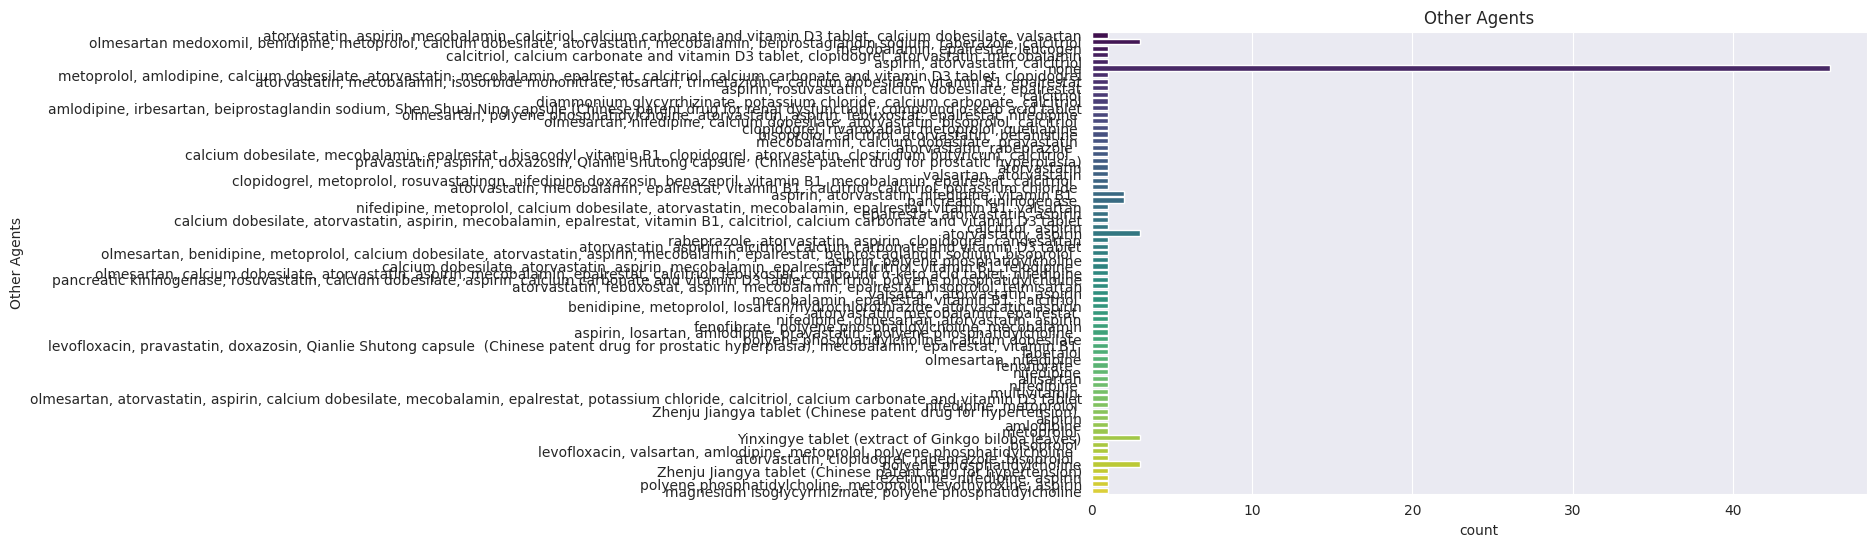

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Other Agents', hue='Other Agents', data=combined_df,
              palette='viridis')
plt.title('Other Agents')
plt.show()

## Hypoglycemia

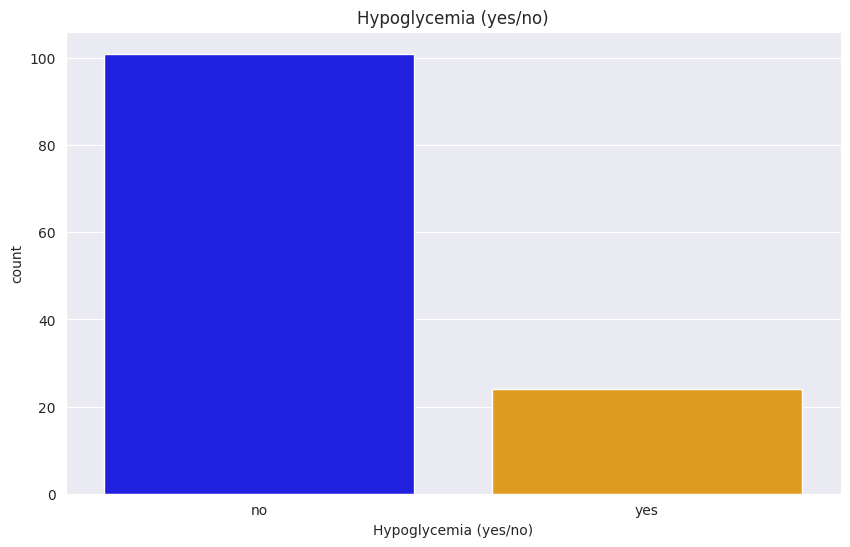

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Hypoglycemia (yes/no)', hue='Hypoglycemia (yes/no)', data=combined_df,
              palette=['blue', 'orange'])
plt.title('Hypoglycemia (yes/no)')
plt.show()

## Gender (Female=1, Male=2)

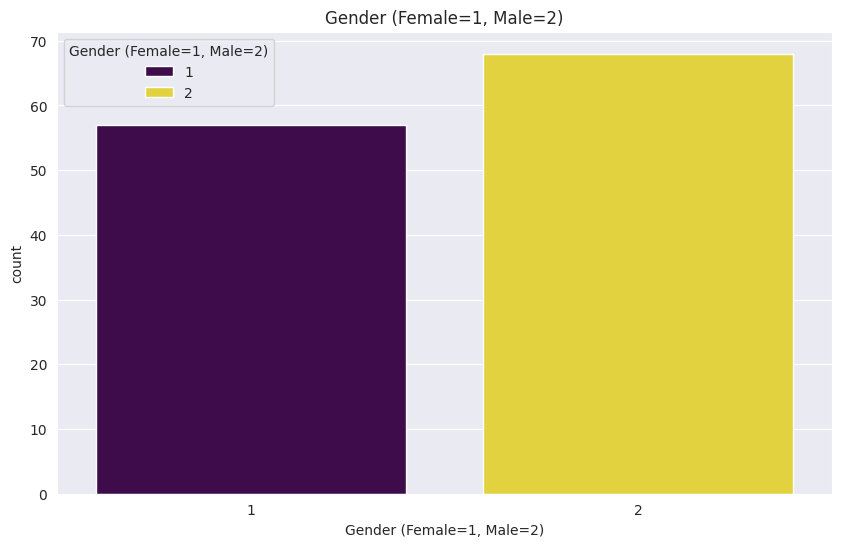

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender (Female=1, Male=2)', hue='Gender (Female=1, Male=2)', data=combined_df, palette='viridis')
plt.title('Gender (Female=1, Male=2)')
plt.show()

## number types

array([[<Axes: title={'center': 'Age (years)'}>,
        <Axes: title={'center': 'Height (m)'}>,
        <Axes: title={'center': 'Weight (kg)'}>,
        <Axes: title={'center': 'BMI (kg/m2)'}>,
        <Axes: title={'center': 'Smoking History (pack year)'}>],
       [<Axes: title={'center': 'Duration of Diabetes (years)'}>,
        <Axes: title={'center': 'Fasting Plasma Glucose (mg/dl)'}>,
        <Axes: title={'center': '2-hour Postprandial Plasma Glucose (mg/dl)'}>,
        <Axes: title={'center': 'Fasting C-peptide (nmol/L)'}>,
        <Axes: title={'center': '2-hour Postprandial C-peptide (nmol/L)'}>],
       [<Axes: title={'center': 'Fasting Insulin (pmol/L)'}>,
        <Axes: title={'center': '2-hour Postprandial Insulin (pmol/L)'}>,
        <Axes: title={'center': 'HbA1c (mmol/mol)'}>,
        <Axes: title={'center': 'Glycated Albumin (%)'}>,
        <Axes: title={'center': 'Total Cholesterol (mmol/L)'}>],
       [<Axes: title={'center': 'Triglyceride (mmol/L)'}>,
        <Axe

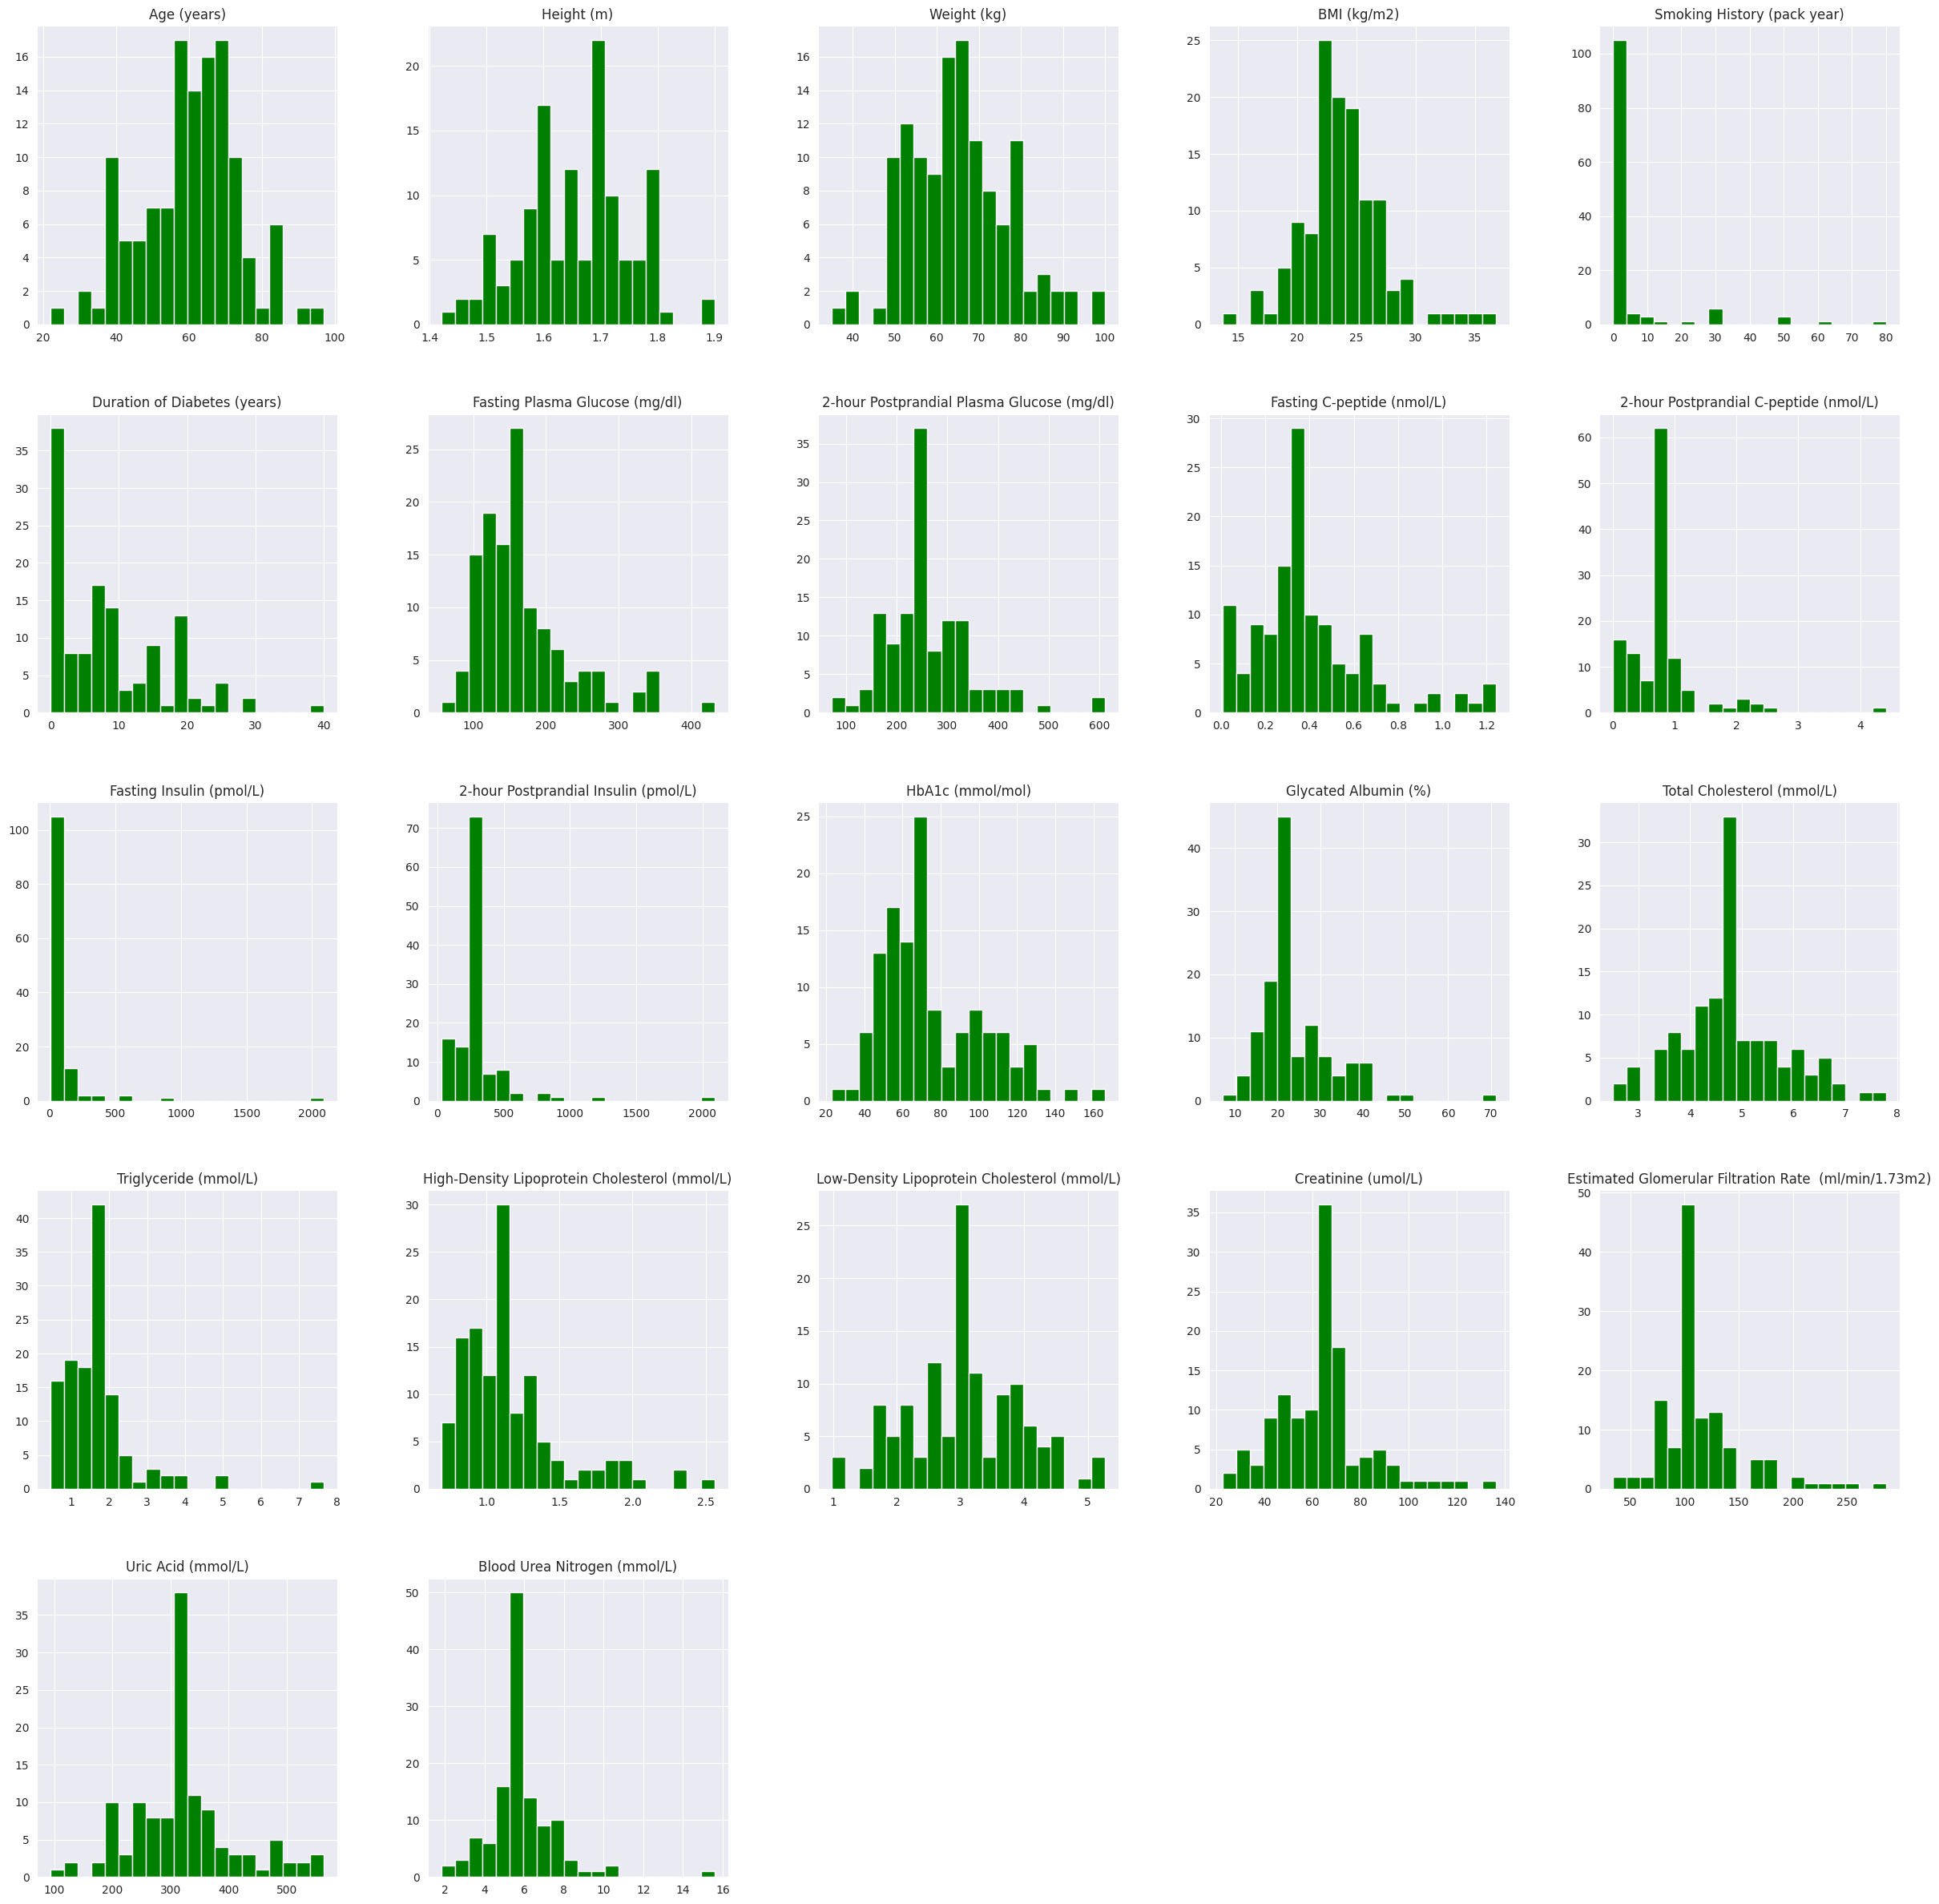

In [56]:
cols_to_fill = [
    'Age (years)', 'Height (m)', 'Weight (kg)', 'BMI (kg/m2)', 'Smoking History (pack year)',
    'Duration of Diabetes (years)', 'Fasting Plasma Glucose (mg/dl)',
    '2-hour Postprandial Plasma Glucose (mg/dl)', 'Fasting C-peptide (nmol/L)',
    '2-hour Postprandial C-peptide (nmol/L)', 'Fasting Insulin (pmol/L)',
    '2-hour Postprandial Insulin (pmol/L)', 'HbA1c (mmol/mol)', 'Glycated Albumin (%)',
    'Total Cholesterol (mmol/L)', 'Triglyceride (mmol/L)',
    'High-Density Lipoprotein Cholesterol (mmol/L)', 'Low-Density Lipoprotein Cholesterol (mmol/L)',
    'Creatinine (umol/L)', 'Estimated Glomerular Filtration Rate  (ml/min/1.73m2)',
    'Uric Acid (mmol/L)', 'Blood Urea Nitrogen (mmol/L)'
]
num_types_combined_df = combined_df[cols_to_fill]
num_types_combined_df.hist(bins=20, figsize=(30, 30), color='green')

# Preparing data

In [57]:
cols_to_fill = [
    'Age (years)', 'Height (m)', 'Weight (kg)', 'BMI (kg/m2)', 'Smoking History (pack year)',
    'Duration of Diabetes (years)', 'Fasting Plasma Glucose (mg/dl)',
    '2-hour Postprandial Plasma Glucose (mg/dl)', 'Fasting C-peptide (nmol/L)',
    '2-hour Postprandial C-peptide (nmol/L)', 'Fasting Insulin (pmol/L)',
    '2-hour Postprandial Insulin (pmol/L)', 'HbA1c (mmol/mol)', 'Glycated Albumin (%)',
    'Total Cholesterol (mmol/L)', 'Triglyceride (mmol/L)',
    'High-Density Lipoprotein Cholesterol (mmol/L)', 'Low-Density Lipoprotein Cholesterol (mmol/L)',
    'Creatinine (umol/L)', 'Estimated Glomerular Filtration Rate  (ml/min/1.73m2)',
    'Uric Acid (mmol/L)', 'Blood Urea Nitrogen (mmol/L)'
]

## emissions

In [58]:
for col in cols_to_fill:
    q1 = combined_df[col].quantile(0.25)
    q3 = combined_df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = combined_df[(combined_df[col] < lower) | (combined_df[col] > upper)]
    print(f'{col}: {len(outliers)} emissions')

Age (years): 2 emissions
Height (m): 1 emissions
Weight (kg): 2 emissions
BMI (kg/m2): 7 emissions
Smoking History (pack year): 22 emissions
Duration of Diabetes (years): 1 emissions
Fasting Plasma Glucose (mg/dl): 7 emissions
2-hour Postprandial Plasma Glucose (mg/dl): 5 emissions
Fasting C-peptide (nmol/L): 8 emissions
2-hour Postprandial C-peptide (nmol/L): 24 emissions
Fasting Insulin (pmol/L): 12 emissions
2-hour Postprandial Insulin (pmol/L): 62 emissions
HbA1c (mmol/mol): 1 emissions
Glycated Albumin (%): 5 emissions
Total Cholesterol (mmol/L): 5 emissions
Triglyceride (mmol/L): 10 emissions
High-Density Lipoprotein Cholesterol (mmol/L): 10 emissions
Low-Density Lipoprotein Cholesterol (mmol/L): 0 emissions
Creatinine (umol/L): 7 emissions
Estimated Glomerular Filtration Rate  (ml/min/1.73m2): 17 emissions
Uric Acid (mmol/L): 7 emissions
Blood Urea Nitrogen (mmol/L): 14 emissions


## check unique values

## Diabetic Macrovascular  Complications

In [59]:
unique_values = set()
for row in combined_df['Diabetic Macrovascular  Complications']:
    for item in row.split(','):
        item = item.strip().lower()
        if item and item != 'none':
            unique_values.add(item)

for value in unique_values:
    print(value)

peripheral arterial disease
cerebrovascular disease
coronary heart disease


## Diabetic Macrovascular  Complications

In [60]:
unique_values = set()
for row in combined_df['Diabetic Microvascular Complications']:
    for item in row.split(','):
        item = item.strip().lower()
        if item and item != 'none':
            unique_values.add(item)

for value in unique_values:
    print(value)

nephropathy
neuropathy
retinopathy


## Other Agent

In [61]:
unique_values = set()
for row in combined_df['Other Agents']:
    for item in row.split(','):
        item = item.strip().lower()
        if item and item != 'none':
            unique_values.add(item)

for value in unique_values:
    print(value)

aspirin
potassium chloride
atorvastatin
bisacodyl
ezetimibe
allisartan
vitamin b1
losartan/hydrochlorothiazide
leucogen
isosorbide mononitrate
pancreatic kininogenase
pravastatin
losartan
clostridium butyricum
benidipine
doxazosin
yinxingye tablet (extract of ginkgo biloba leaves)
diammonium glycyrrhizinate
metoprolol
qianlie shutong capsule  (chinese patent drug for prostatic hyperplasia)
telmisartan
mecobalamin
rivaroxaban
levofloxacin
calcium carbonate and vitamin d3 tablet
benazepril
compound α-keto acid tablet
candesartan
calcium carbonate
magnesium isoglycyrrhizinate
felodipine
olmesartan
multivitamin
trimetazidine
rosuvastatin
nifedipine
rosuvastatinqn
levothyroxine
fenofibrate
epalrestat
clopidogrel
zhenju jiangya tablet (chinese patent drug for hypertension)
nifedipine doxazosin
betahistine
polyene phosphatidylcholine
bisoprolol
amlodipine
shen shuai ning capsule (chinese patent drug for renal dysfunction)
calcium dobesilate
febuxostat
calcitriol
valsartan
raberazole
labetalol

## Comorbidities

In [62]:
unique_values = set()
for row in combined_df['Comorbidities']:
    for item in row.split(','):
        item = item.strip().lower()
        if item and item != 'none':
            unique_values.add(item)

for value in unique_values:
    print(value)

hypertension
chronic gastritis
parkinson's disease
parotid gland carcinoma
psoriasis
kidney cyst
atrial fibrillation
liver cyst
sinus bradycardia
cataract
lumbar herniated disc
alzheimer's disease
hyperuricemia
hyperlipidemia
hypoparathyroidism
lung lesion
hypoleukocytemia
leucopenia
sinus arrhythmia
periodontitis
nephrolithiasis
hepatic dysfunction
enlarged adrenal gland
urinary tract infection
hypokalemia
cholelithiasis
hypocalcemia
fatty liver disese
thyroid nodule
anxiety
gallbladder polyp
gastric polyp
hypothyroidism
cholecystitis
myocardial bridging
chronic hepatitis b
breast cancer
vitamin d deficiency
systemic sclerosis
hydronephrosis
fatty liver disease
prostatic hyperplasia
osteoporosis
pulmonary nodule
osteopenia
lumbar spine tumor
cerebrovascular disease
chronic atrophic gastritis
hysteromyoma
conjunctivitis
pancreatic cancer
colorectal polyp


## Hypoglycemic Agents

In [63]:
unique_values = set()
for row in combined_df['Hypoglycemic Agents']:
    for item in row.split(','):
        item = item.strip().lower()
        if item and item != 'none':
            unique_values.add(item)

for value in unique_values:
    print(value)

canagliflozin
novolin 50r
repaglinide
gansulin r
pioglitazone
insulin degludec
novolin 30r
gansulin 40r
humulin 70/30
gliquidone
acarbose
sitagliptin
glimepiride
humulin r
insulin glargine
dapagliflozin
insulin aspart 70/30
insulin aspart
insulin glulisine
liraglutide
insulin glarigine
insulin detemir
metformin
insulin aspart 50/50
voglibose
novolin r
gliclazide


## correction emissions

In [64]:
combined_df = combined_df[combined_df['Fasting Insulin (pmol/L)'] < 700]
combined_df = combined_df[combined_df['2-hour Postprandial Insulin (pmol/L)'] < 800]

## fix faulty values

In [69]:
# rosuvastatinqn
# combined_df['Other Agents'] = combined_df['Other Agents'].astype(str)
combined_df.replace('rosuvastatinqn', 'rosuvastatin', inplace=True)
# combined_df.replace('/', pd.NA, inplace=True)
# raberazole
# combined_df['Other Agents'] = combined_df['Other Agents'].replace('rabeprazole', 'raberazole')

# calcium carbonate and vitamin d3 tablet
# combined_df['Other Agents'] = combined_df['Other Agents'].replace('calcium carbonate and vitamin d3 tablet', 'calcium carbonate, vitamin d3 tablet')

combined_df.to_csv('finish.csv')

## split data in some objects types (WE SKIP IT, 'CAUSE WE WILL HAVE A LOT OF COLUMNS)

### Diabetic Macrovascular  Complications /  Diabetic Microvascular Complications / Other Agent / Comorbidities/ Hypoglycemic Agents (it's not important)

In [66]:
# unique_values = set()
# for row in combined_df['Diabetic Macrovascular  Complications']:
#     for item in row.split(','):
#         item = item.strip().lower()
#         if item and item != 'none':
#             unique_values.add(item)
#
# for value in unique_values:
#     print(value)
#     column_name = value.replace(' ', '_')
#     combined_df[column_name] = combined_df['Diabetic Macrovascular  Complications'].apply(
#         lambda x: int(value in x.lower())
#     )


# grouped columns

## Other Agents

In [67]:
from collections import defaultdict

# input data (drug name : category)
drug_to_group = {
    # hypolipidemic
    'pravastatin': 'hypolipidemic',
    'rosuvastatin': 'hypolipidemic',
    'fenofibrate': 'hypolipidemic',
    'ezetimibe': 'hypolipidemic',
    'atorvastatin': 'hypolipidemic',
    'rosuvastatinqn (err)': 'hypolipidemic',

    # angioprotectors
    'calcium dobesilate': 'angioprotectors',
    'beiprostaglandin sodium': 'angioprotectors',

    # ace inhibitors
    'benazepril': 'ace_inhibitors',

    # minerals and vitamins
    'potassium chloride': 'minerals_and_vitamins',
    'calcium carbonate and vitamin d3 tablet (todo split)': 'minerals_and_vitamins',
    'calcium carbonate': 'minerals_and_vitamins',
    'calcitriol': 'minerals_and_vitamins',
    'multivitamin': 'minerals_and_vitamins',
    'vitamin b1': 'minerals_and_vitamins',
    'mecobalamin': 'minerals_and_vitamins',

    # probiotics
    'clostridium butyricum': 'probiotics',

    # ARB
    'telmisartan': 'arb',
    'valsartan': 'arb',
    'olmesartan medoxomil': 'arb',
    'olmesartan': 'arb',
    'losartan': 'arb',
    'losartan/hydrochlorothiazide': 'arb',
    'irbesartan': 'arb',
    'candesartan': 'arb',
    'allisartan': 'arb',

    # psychotropic
    'quetiapine': 'psychotropic',

    # antianginal
    'isosorbide mononitrate': 'antianginal',

    # gout treatment
    'febuxostat': 'gout_treatment',

    # laxatives
    'bisacodyl': 'laxatives',

    # urological drugs
    'qianlie shutong capsule': 'urological_drugs',
    'zhenju jiangya tablet': 'urological_drugs',

    # calcium channel blockers
    'nifedipine': 'calcium_channel_blockers',
    'amlodipine': 'calcium_channel_blockers',
    'felodipine': 'calcium_channel_blockers',
    'benidipine': 'calcium_channel_blockers',

    # antiarrhythmic
    'doxazosin': 'antiarrhythmic',
    'labetalol': 'antiarrhythmic',
    'bisoprolol': 'antiarrhythmic',
    'metoprolol': 'antiarrhythmic',

    # gastroprotective
    'rabeprazole': 'gastroprotective',
    'raberazole (err)': 'gastroprotective',

    # circulatory support
    'yinxingye tablet': 'circulatory_support',

    # antithrombotic
    'aspirin': 'antithrombotic',
    'clopidogrel': 'antithrombotic',
    'rivaroxaban': 'antithrombotic',

    # vasodilators
    'trimetazidine': 'vasodilators',
    'magnesium isoglycyrrhizinate': 'vasodilators',

    # pancreatic
    'pancreatic kininogenase': 'pancreatic',

    # neuroprotectors
    'epalrestat': 'neuroprotectors',

    # kidney support
    'compound α-keto acid tablet': 'kidney_support',
    'shen shuai ning capsule': 'kidney_support',

    # hepatoprotector
    'polyene phosphatidylcholine': 'hepatoprotector',
    'diammonium glycyrrhizinate': 'hepatoprotector',

    # immunomodulators
    'leucogen': 'immunomodulators',

    # thyroid diseases
    'levothyroxine': 'thyroid_diseases',

    # antibiotics
    'levofloxacin': 'antibiotics',

    # vestibular disorders
    'betahistine': 'vestibular_disorders',
}

# Группируем препараты по категориям
grouped_drugs = defaultdict(list)
issues = []

for drug, group in drug_to_group.items():
    if 'err' in drug or 'todo' in drug:
        issues.append((drug, group))
    else:
        grouped_drugs[group].append(drug)

# Вывод по группам
for group, drugs in grouped_drugs.items():
    print(f"\n{group}:")
    for d in drugs:
        print(f"  - {d}")

# Вывод проблемных элементов
print("\n# ⚠️ Проблемные записи:")
for d, g in issues:
    print(f"{g}: {d}")



hypolipidemic:
  - pravastatin
  - rosuvastatin
  - fenofibrate
  - ezetimibe
  - atorvastatin

angioprotectors:
  - calcium dobesilate
  - beiprostaglandin sodium

ace_inhibitors:
  - benazepril

minerals_and_vitamins:
  - potassium chloride
  - calcium carbonate
  - calcitriol
  - multivitamin
  - vitamin b1
  - mecobalamin

probiotics:
  - clostridium butyricum

arb:
  - telmisartan
  - valsartan
  - olmesartan medoxomil
  - olmesartan
  - losartan
  - losartan/hydrochlorothiazide
  - irbesartan
  - candesartan
  - allisartan

psychotropic:
  - quetiapine

antianginal:
  - isosorbide mononitrate

gout_treatment:
  - febuxostat

laxatives:
  - bisacodyl

urological_drugs:
  - qianlie shutong capsule
  - zhenju jiangya tablet

calcium_channel_blockers:
  - nifedipine
  - amlodipine
  - felodipine
  - benidipine

antiarrhythmic:
  - doxazosin
  - labetalol
  - bisoprolol
  - metoprolol

gastroprotective:
  - rabeprazole

circulatory_support:
  - yinxingye tablet

antithrombotic:
  - a

## drop unused columns

In [68]:
split_df = combined_df.drop(columns=['Other Agents', 'Diabetic Macrovascular  Complications',
                                     'Diabetic Microvascular Complications', 'Comorbidities'])
split_df = split_df.drop(columns=[
    'Hypoglycemic Agents'])  # delete this column, because we predict type of diabetes. Hypoglycemic Agents contains of type of drugs/insulin
split_df.head()

,Patient Number,"Gender (Female=1, Male=2)",Age (years),Height (m),Weight (kg),BMI (kg/m2),Smoking History (pack year),Alcohol Drinking History (drinker/non-drinker),Type of Diabetes,Duration of Diabetes (years),...,Glycated Albumin (%),Total Cholesterol (mmol/L),Triglyceride (mmol/L),High-Density Lipoprotein Cholesterol (mmol/L),Low-Density Lipoprotein Cholesterol (mmol/L),Creatinine (umol/L),Estimated Glomerular Filtration Rate (ml/min/1.73m2),Uric Acid (mmol/L),Blood Urea Nitrogen (mmol/L),Hypoglycemia (yes/no)
0,1001_0_20210730,1,66,1.5,60,26.67,0.0,non-drinker,T1DM,10.00,...,40.7,3.59,1.02,0.86,2.01,37.3,160.0,188.86,6.47,no
1,1002_0_20210504,2,68,1.7,63,21.80,50.0,drinker,T1DM,26.00,...,19.6,4.78,2.20,0.93,3.28,66.8,109.0,342.57,6.05,yes
2,1002_1_20210521,2,68,1.7,67,23.18,50.0,drinker,T1DM,26.00,...,19.6,4.78,2.20,0.93,3.28,69.4,104.0,322.18,3.06,yes
3,1002_2_20210909,2,68,1.7,65,22.49,50.0,drinker,T1DM,26.00,...,25.1,3.49,1.82,0.84,1.83,63.7,115.0,342.34,6.21,yes
4,1003_0_20210831,2,37,1.9,60,16.62,0.0,non-drinker,T1DM,0.08,...,46.6,5.61,1.14,1.08,3.95,49.6,174.0,93.39,1.85,yes
